In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722_Iteration_4').getOrCreate()

# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Explore the data

In [2]:
# Use Spark to read in the Ecommerce Customers csv file. 
AirDataI = spark.read.csv("AirPollution_summary.csv",inferSchema=True,header=True)

In [3]:
AirDataI.printSchema()
AirDataI.head()

root
 |-- _c0: integer (nullable = true)
 |-- Measurement date: string (nullable = true)
 |-- Station code: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- PM2.5: integer (nullable = true)
 |-- class1: integer (nullable = true)
 |-- class2: integer (nullable = true)



Row(_c0=0, Measurement date='2017/1/1 0:00', Station code=101, Address='19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea', Latitude=37.5720164, Longitude=127.0050075, SO2=0.004, NO2=0.059, O3=0.002, CO=1.2, PM10=73, PM2.5=57, class1=0, class2=1)

In [4]:
AirDataI.dtypes

[('_c0', 'int'),
 ('Measurement date', 'string'),
 ('Station code', 'int'),
 ('Address', 'string'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('SO2', 'double'),
 ('NO2', 'double'),
 ('O3', 'double'),
 ('CO', 'double'),
 ('PM10', 'int'),
 ('PM2.5', 'int'),
 ('class1', 'int'),
 ('class2', 'int')]

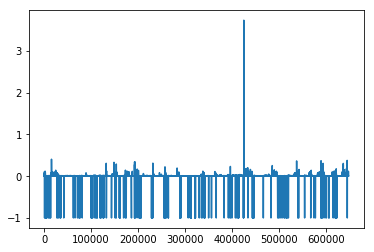

In [5]:
plt.plot(np.array(AirDataI.select('SO2').collect()))
plt.show()

In [6]:
AirDataI.count()

647511

# Data Clean

In [3]:
AirDataII = AirDataI.withColumnRenamed("PM2.5","PM2_5")
AirDataII.head()

Row(_c0=0, Measurement date='2017/1/1 0:00', Station code=101, Address='19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea', Latitude=37.5720164, Longitude=127.0050075, SO2=0.004, NO2=0.059, O3=0.002, CO=1.2, PM10=73, PM2_5=57, class1=0, class2=1)

In [23]:
AirDataII.select('_c0','Measurement date','Station code','Address','Latitude','Longitude','SO2','NO2','O3','CO','PM10','PM2_5').show()

+---+----------------+------------+--------------------+----------+-----------+-----+-----+-----+----+----+-----+
|_c0|Measurement date|Station code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3|  CO|PM10|PM2_5|
+---+----------------+------------+--------------------+----------+-----------+-----+-----+-----+----+----+-----+
|  0|   2017/1/1 0:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002| 1.2|  73|   57|
|  1|   2017/1/1 1:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002| 1.2|  71|   59|
|  2|   2017/1/1 2:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002| 1.2|  70|   59|
|  3|   2017/1/1 3:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002| 1.2|  70|   58|
|  4|   2017/1/1 4:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002| 1.2|  69|   61|
|  5|   2017/1/1 5:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.0

In [4]:
AirData = AirDataII.select('Station code',
                           'SO2',
                           'NO2',
                           'O3',
                           'CO',
                           'PM10',
                           'PM2_5',
                           'class1',
                           'class2')
print(AirData.count())

647511


In [9]:
print(len(AirDataII.columns))
print(len(AirData.columns))
AirData.show()

14
9
+------------+-----+-----+-----+----+----+-----+------+------+
|Station code|  SO2|  NO2|   O3|  CO|PM10|PM2_5|class1|class2|
+------------+-----+-----+-----+----+----+-----+------+------+
|         101|0.004|0.059|0.002| 1.2|  73|   57|     0|     1|
|         101|0.004|0.058|0.002| 1.2|  71|   59|     0|     1|
|         101|0.004|0.056|0.002| 1.2|  70|   59|     0|     1|
|         101|0.004|0.056|0.002| 1.2|  70|   58|     0|     1|
|         101|0.003|0.051|0.002| 1.2|  69|   61|     0|     1|
|         101|0.003|0.046|0.002| 1.1|  70| null|     0|     1|
|         101|0.003|0.049|0.002| 1.1|  66|   57|     0|     1|
|         101|0.003|0.045|0.002| 1.0|  71|   60|     0|     1|
|         101|0.004|0.047|0.002| 1.1|  72|   60|     0|     1|
|         101|0.003|0.047|0.002| 1.1|  74|   63|     0|     1|
|         101|0.004|0.045|0.004| 1.0|  76|   68|     0|     1|
|         101|0.004|0.048|0.005| 1.0|  83|   74|     0|     1|
|         101|0.004|0.054|0.005| 1.0|  93|   79|  

In [5]:
print("Original ",AirData.count())
tempset = AirData.na.drop(subset="Station code")
print("New ",tempset.count())

Original  647511
New  647470


In [6]:
from pyspark.sql.functions import mean

# Let's collect the average. You'll notice that the collection returns the average in an interesting format.
mean_SO2 = tempset.select(mean(tempset['SO2'])).collect()
mean_NO2 = tempset.select(mean(tempset['NO2'])).collect()
mean_O3 = tempset.select(mean(tempset['O3'])).collect()
mean_CO = tempset.select(mean(tempset['CO'])).collect()
mean_PM10 = tempset.select(mean(tempset['PM10'])).collect()
mean_PM2_5 = tempset.select(mean(tempset['PM2_5'])).collect()
print(mean_SO2,mean_NO2,mean_O3,mean_CO,mean_PM10,mean_PM2_5)

[Row(avg(SO2)=-0.001795500741384939)] [Row(avg(NO2)=0.02251788348283784)] [Row(avg(O3)=0.017978183373982992)] [Row(avg(CO)=0.5091966947250777)] [Row(avg(PM10)=43.707006428454484)] [Row(avg(PM2_5)=25.411403285221137)]


In [7]:
tempset = tempset.na.fill(mean_SO2[0][0], subset=['SO2'])
tempset = tempset.na.fill(mean_NO2[0][0], subset=['NO2'])
tempset = tempset.na.fill(mean_O3[0][0], subset=['O3'])
tempset = tempset.na.fill(mean_CO[0][0], subset=['CO'])
tempset = tempset.na.fill(mean_PM10[0][0], subset=['PM10'])
tempset = tempset.na.fill(mean_PM2_5[0][0], subset=['PM2_5'])

In [8]:
airdata = tempset.filter( (tempset['SO2'] > 0)
                        & (tempset['NO2'] > 0)
                        & (tempset['O3'] > 0)
                        & (tempset['CO'] > 0)
                        & (tempset['PM10'] > 0)
                        & (tempset['PM2_5'] > 0))
airdata.count()

632381

#### Set up target column

In [14]:
# use "class1" as target
airdata1 = airdata.select('Station code',
                           'SO2',
                           'NO2',
                           'O3',
                           'CO',
                           'PM10',
                           'PM2_5',
                           'class1')

# use "class2" as target
airdata2 = airdata.select('Station code',
                           'SO2',
                           'NO2',
                           'O3',
                           'CO',
                           'PM10',
                           'PM2_5',
                           'class2')

# Modeling

In [9]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [10]:
# The input columns are the feature column names
assembler = VectorAssembler(
    inputCols=['SO2',
               'NO2',
               'O3',
               'CO',
               'PM10',
               'PM2_5'],
    outputCol="features")

In [11]:
# Now that we've created the assembler variable, let's actually transform the data.
output = assembler.transform(airdata)

In [12]:
# Using print schema to see that the features output column has been added. 
output.printSchema()
output.head(1)

root
 |-- Station code: integer (nullable = true)
 |-- SO2: double (nullable = false)
 |-- NO2: double (nullable = false)
 |-- O3: double (nullable = false)
 |-- CO: double (nullable = false)
 |-- PM10: integer (nullable = true)
 |-- PM2_5: integer (nullable = true)
 |-- class1: integer (nullable = true)
 |-- class2: integer (nullable = true)
 |-- features: vector (nullable = true)



[Row(Station code=101, SO2=0.004, NO2=0.059, O3=0.002, CO=1.2, PM10=73, PM2_5=57, class1=0, class2=1, features=DenseVector([0.004, 0.059, 0.002, 1.2, 73.0, 57.0]))]

In [13]:
lrdata = output.select("features",'class1','class2')
lrdata.show()

+--------------------+------+------+
|            features|class1|class2|
+--------------------+------+------+
|[0.004,0.059,0.00...|     0|     1|
|[0.004,0.058,0.00...|     0|     1|
|[0.004,0.056,0.00...|     0|     1|
|[0.004,0.056,0.00...|     0|     1|
|[0.003,0.051,0.00...|     0|     1|
|[0.003,0.046,0.00...|     0|     1|
|[0.003,0.049,0.00...|     0|     1|
|[0.003,0.045,0.00...|     0|     1|
|[0.004,0.047,0.00...|     0|     1|
|[0.003,0.047,0.00...|     0|     1|
|[0.004,0.045,0.00...|     0|     1|
|[0.004,0.048,0.00...|     0|     1|
|[0.004,0.054,0.00...|     0|     1|
|[0.005,0.05,0.007...|     0|     1|
|[0.006,0.055,0.00...|     0|     1|
|[0.006,0.056,0.00...|     0|     1|
|[0.006,0.063,0.00...|     0|     1|
|[0.005,0.063,0.00...|     0|     1|
|[0.005,0.063,0.00...|     0|     1|
|[0.005,0.062,0.00...|     0|     1|
+--------------------+------+------+
only showing top 20 rows



In [14]:
# Let's do a randomised 70/30 split. 
train_data,test_data = lrdata.randomSplit([0.7,0.3])

## Linear Regression

In [15]:
from pyspark.ml.regression import LinearRegression

In [16]:
lr1 = LinearRegression(labelCol='class1')
lr2 = LinearRegression(labelCol='class2')

In [17]:
# Fit the model to the data.
lrModel1 = lr1.fit(train_data.select("features",'class1'))
lrModel2 = lr2.fit(train_data.select("features",'class2'))

In [18]:
# Print the coefficients and intercept for linear regression of class1.
print("Class 1:")
print("Coefficients: {} Intercept: {}".format(lrModel1.coefficients,lrModel1.intercept))

Class 1:
Coefficients: [0.5479799754580255,-0.05477291080505086,-0.020844172205460126,-0.016432893516060438,0.0005169037469957465,-6.31950956380888e-05] Intercept: -0.011147176720307555


In [19]:
# Print the coefficients and intercept for linear regression of class2.
print("Class 2:")
print("Coefficients: {} Intercept: {}".format(lrModel2.coefficients,lrModel2.intercept))

Class 2:
Coefficients: [-0.4841704155141556,-0.06013054446916638,0.3581319991134589,0.10495727353859298,0.0002652139869917895,0.00037249596690548285] Intercept: 0.8435022920377495


#### Class 1

In [20]:
# Let's evaluate the model against the test data.
test_results1 = lrModel1.evaluate(test_data.select("features",'class1'))

In [21]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results1.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results1.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
|5.789101286096977E-4|
|-0.05349450363092832|
|-0.22184699660837262|
|0.012600707331867966|
|0.006416202169526...|
|0.011407940161938952|
|0.013392994863150752|
|0.008618237435567805|
|-0.00427167797426...|
|-0.00344506960632...|
|-0.01233393258921...|
| 0.01259847344224081|
|0.009232265016801232|
|0.003994877764520523|
|-0.09195724103344172|
| 0.00856742716221541|
|  0.0139152235707293|
|0.003688066543040317|
|0.008126840242338612|
|0.013733814316086041|
+--------------------+
only showing top 20 rows

RSME: 0.025094327198250978


In [22]:
# We can also get the R2 value. 
print("R2: {}".format(test_results1.r2))

R2: 0.6620190680279838


#### Class 2

In [23]:
# Let's evaluate the model against the test data.
test_results2 = lrModel2.evaluate(test_data.select("features",'class2'))

In [24]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results2.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results2.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
| 0.12291809452711244|
|-0.01222642157901177|
|-0.18312509619299977|
| 0.12620242595432707|
| 0.11511133063729251|
| 0.08184785254793936|
| 0.09604145947210696|
| 0.11516287622150989|
| -0.8727675692261027|
| 0.09732141875382405|
| 0.07298280399552104|
| 0.11952223859217814|
| 0.11547385678517874|
| 0.10283621728640713|
|-0.02182711780999025|
| 0.09448342891392358|
| 0.09821759454360446|
| 0.07371341801580078|
| 0.11574855128947537|
| 0.09432796866210191|
+--------------------+
only showing top 20 rows

RSME: 0.2595718580277865


In [25]:
# We can also get the R2 value. 
print("R2: {}".format(test_results2.r2))

R2: 0.02839927515673979


## Logistic Regression

In [26]:
from pyspark.ml.classification import LogisticRegression

In [27]:
lor1 = LogisticRegression(featuresCol='features',labelCol='class1')
lor2 = LogisticRegression(featuresCol='features',labelCol='class2')

In [28]:
# Fit the model to the data.
lorModel1 = lor1.fit(train_data.select("features",'class1'))
lorModel2 = lor2.fit(train_data.select("features",'class2'))

#### Class 1

In [29]:
lorModel1.summary.predictions.show()

+--------------------+------+--------------------+--------------------+----------+
|            features|class1|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|[0.001,0.001,0.03...|   0.0|[185.161254715276...|[1.0,3.8502489834...|       0.0|
|[0.001,0.001,0.06...|   0.0|[181.945512359564...|[1.0,9.5955080734...|       0.0|
|[0.001,0.002,0.00...|   0.0|[108.746714530620...|[1.0,5.9142809906...|       0.0|
|[0.001,0.003,0.00...|   0.0|[105.481041924962...|[1.0,1.5494071172...|       0.0|
|[0.001,0.003,0.00...|   0.0|[185.509142822456...|[1.0,2.7189606955...|       0.0|
|[0.001,0.003,0.03...|   0.0|[186.157760924035...|[1.0,1.4213848011...|       0.0|
|[0.001,0.003,0.03...|   0.0|[187.501129882438...|[1.0,3.7093169274...|       0.0|
|[0.001,0.003,0.04...|   0.0|[188.676887033769...|[1.0,1.1446404746...|       0.0|
|[0.001,0.003,0.04...|   0.0|[188.567641391024...|[1.0,1.2767735536...|       0.0|
|[0.

In [30]:
# Let's evaluate the model against the test data.
results1 = lorModel1.transform(test_data.select("features",'class1'))
my_eval1 = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='class1')

In [31]:
AUC = my_eval1.evaluate(results1)

AUC

0.997177830498283

#### Class 2

In [32]:
lorModel2.summary.predictions.show()

+--------------------+------+--------------------+--------------------+----------+
|            features|class2|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|[0.001,0.001,0.03...|   1.0|[1.85584516132626...|[0.86481193234640...|       0.0|
|[0.001,0.001,0.06...|   1.0|[-3.1235500998208...|[0.04214622142544...|       1.0|
|[0.001,0.002,0.00...|   1.0|[-2.5075421159100...|[0.07533113813207...|       1.0|
|[0.001,0.003,0.00...|   1.0|[-2.3717910242362...|[0.08534921973671...|       1.0|
|[0.001,0.003,0.00...|   0.0|[7.13401860070048...|[0.99920312743948...|       0.0|
|[0.001,0.003,0.03...|   1.0|[1.30815130553348...|[0.78720363796980...|       0.0|
|[0.001,0.003,0.03...|   1.0|[1.01349949552064...|[0.73370444743525...|       0.0|
|[0.001,0.003,0.04...|   1.0|[-0.0624020081156...|[0.48440455837729...|       1.0|
|[0.001,0.003,0.04...|   1.0|[-0.1658330243967...|[0.45863649389001...|       1.0|
|[0.

In [33]:
# Let's evaluate the model against the test data.
results2 = lorModel2.transform(test_data.select("features",'class2'))
my_eval2 = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='class2')

In [34]:
AUC = my_eval2.evaluate(results2)

AUC

0.750010419675927

## Tree Methods

In [16]:
# Let's import the relevant classifiers. 
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier

#### Class 1

In [16]:
# Use defaults set
dtc1 = DecisionTreeClassifier(labelCol='class1',featuresCol='features')
rfc1 = RandomForestClassifier(labelCol='class1',featuresCol='features')
gbt1 = GBTClassifier(labelCol='class1',featuresCol='features')

In [17]:
# Train the models: DTC Tree, RFC Tree, GBT Tree
dtc_model1 = dtc1.fit(train_data.select("features",'class1'))
rfc_model1 = rfc1.fit(train_data.select("features",'class1'))
gbt_model1 = gbt1.fit(train_data.select("features",'class1'))

In [18]:
# Model Comparison
dtc_predictions1 = dtc_model1.transform(test_data.select("features",'class1'))
rfc_predictions1 = rfc_model1.transform(test_data.select("features",'class1'))
gbt_predictions1 = gbt_model1.transform(test_data.select("features",'class1'))

In [21]:
# The label column "class1"
my_binary_eval1 = BinaryClassificationEvaluator(labelCol = 'class1')

In [22]:
# DTC Accuracy
print("DTC")
print(my_binary_eval1.evaluate(dtc_predictions1))

# RFC Accuracy
print("RFC")
print(my_binary_eval1.evaluate(rfc_predictions1))

# GBT Accuracy
my_binary_gbt_eval1 = BinaryClassificationEvaluator(labelCol='class1', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval1.evaluate(gbt_predictions1))

DTC
0.986015492538146
RFC
0.9966954434828434
GBT
0.6445361585531949


#### Class 2

In [17]:
# Use defaults set
dtc2 = DecisionTreeClassifier(labelCol='class2',featuresCol='features')
rfc2 = RandomForestClassifier(labelCol='class2',featuresCol='features')
gbt2 = GBTClassifier(labelCol='class2',featuresCol='features')

In [18]:
# Train the models: DTC Tree, RFC Tree, GBT Tree
dtc_model2 = dtc2.fit(train_data.select("features",'class2'))
rfc_model2 = rfc2.fit(train_data.select("features",'class2'))
gbt_model2 = gbt2.fit(train_data.select("features",'class2'))

In [19]:
# Model Comparison
dtc_predictions2 = dtc_model2.transform(test_data.select("features",'class2'))
rfc_predictions2 = rfc_model2.transform(test_data.select("features",'class2'))
gbt_predictions2 = gbt_model2.transform(test_data.select("features",'class2'))

In [20]:
# The label column "class2"
my_binary_eval2 = BinaryClassificationEvaluator(labelCol = 'class2')

In [21]:
# DTC Accuracy
print("DTC")
print(my_binary_eval2.evaluate(dtc_predictions2))

# RFC Accuracy
print("RFC")
print(my_binary_eval2.evaluate(rfc_predictions2))

# GBT Accuracy
my_binary_gbt_eval2 = BinaryClassificationEvaluator(labelCol='class2', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval2.evaluate(gbt_predictions2)) 

DTC
0.987212912750262
RFC
0.9999676588150211
GBT
0.9979119479048697
